In [1]:
'''
【練習問題】自動車の走行距離予測

カラム	ヘッダ名称	データ型	説明
0	id	int	インデックスとして使用
1	mpg	float	ガソリン１ガロンあたりの走行距離（mile par gallon の略）
2	cylinders	varchar	シリンダー
3	displacement	float	排気量
4	horsepower	float	馬力
5	weight	float	重量
6	acceleration	float	加速度
7	model year	varchar	年式
8	origin	varchar	起源
9	car name	varchar	車名

・精度評価は、評価関数「RMSE」を使用します。
・評価値は0以上の値をとり、精度が高いほど小さな値となります。

'''

'\n【練習問題】自動車の走行距離予測\n\nカラム\tヘッダ名称\tデータ型\t説明\n0\tid\tint\tインデックスとして使用\n1\tmpg\tfloat\tガソリン１ガロンあたりの走行距離（mile par gallon の略）\n2\tcylinders\tvarchar\tシリンダー\n3\tdisplacement\tfloat\t排気量\n4\thorsepower\tfloat\t馬力\n5\tweight\tfloat\t重量\n6\tacceleration\tfloat\t加速度\n7\tmodel year\tvarchar\t年式\n8\torigin\tvarchar\t起源\n9\tcar name\tvarchar\t車名\n\n・精度評価は、評価関数「RMSE」を使用します。\n・評価値は0以上の値をとり、精度が高いほど小さな値となります。\n\n'

In [2]:
# データセットを読み込むためにpandasをインポートする
import pandas as pd

# pandasのread_csvメソッドを用いてトレーニングデータを読み込む
train_data = pd.read_csv('./train.tsv', delimiter='\t')

In [3]:
train_data

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel
...,...,...,...,...,...,...,...,...,...,...
194,384,40.8,4,85.0,65.00,2110.0,19.2,80,3,datsun 210
195,385,20.2,8,302.0,139.0,3570.0,12.8,78,1,mercury monarch ghia
196,387,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
197,395,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


In [4]:
train_data_X = train_data.iloc[:,2:]
train_data_Y = train_data.iloc[:,1]

In [5]:
train_data_X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel
...,...,...,...,...,...,...,...,...
194,4,85.0,65.00,2110.0,19.2,80,3,datsun 210
195,8,302.0,139.0,3570.0,12.8,78,1,mercury monarch ghia
196,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
197,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


In [6]:
train_data_Y

0      29.0
1      31.9
2      19.0
3      28.0
4      37.7
       ... 
194    40.8
195    20.2
196    16.0
197    43.4
198    26.0
Name: mpg, Length: 199, dtype: float64

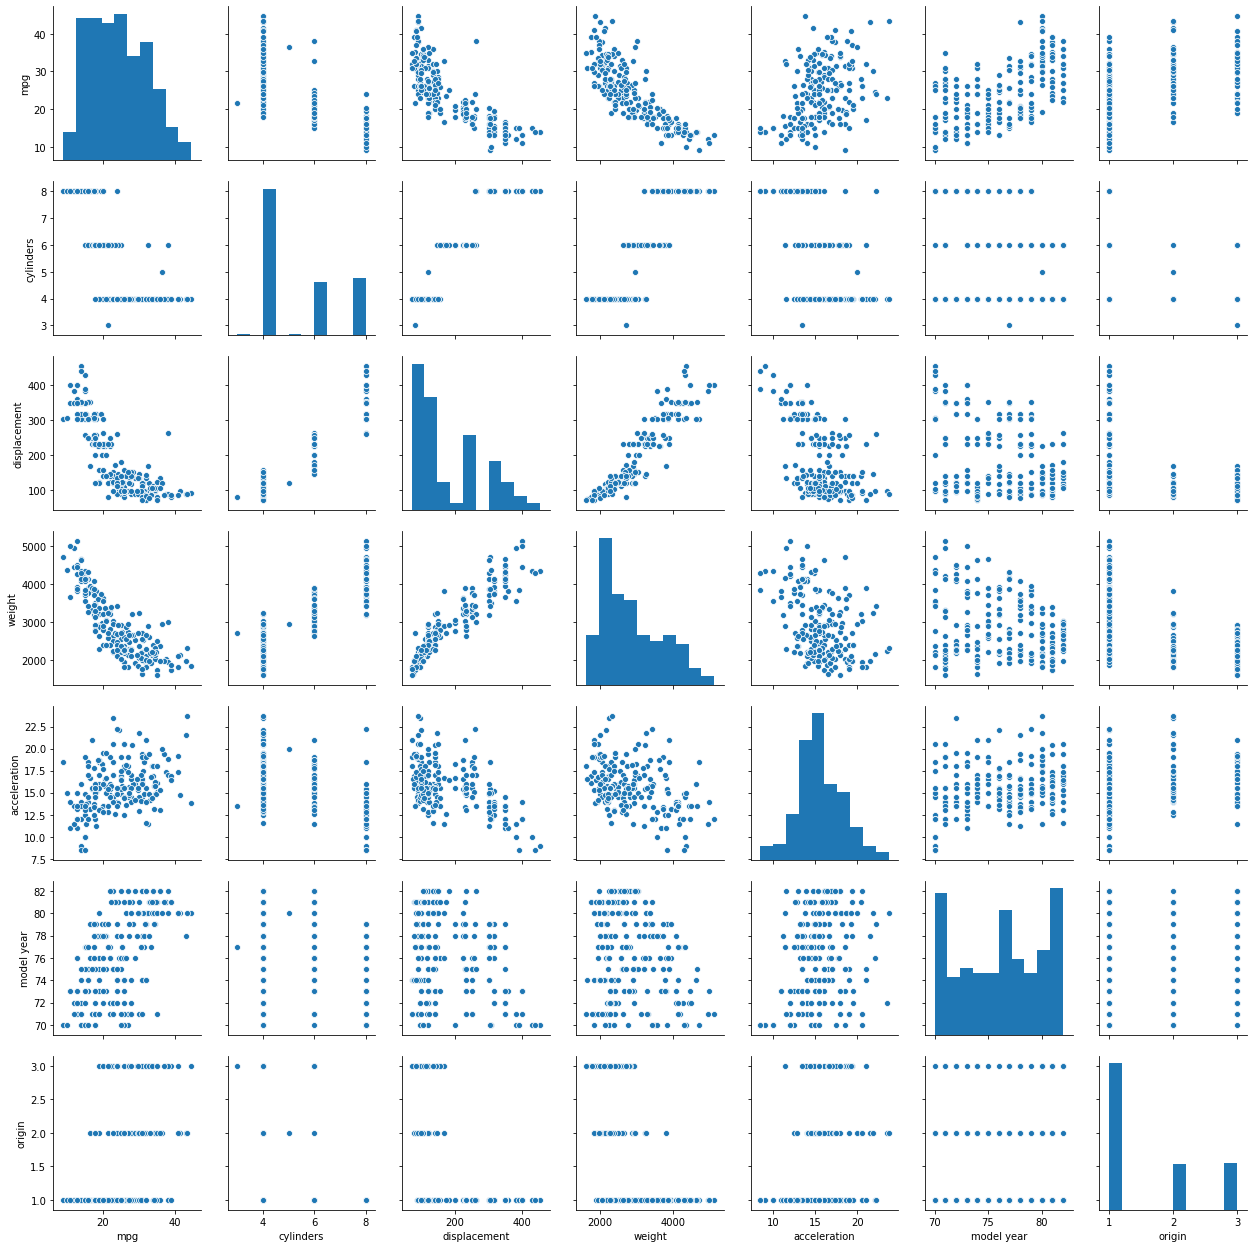

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(train_data.iloc[:,1:9])

In [23]:
train_data.iloc[:,1:2]

,mpg
0,29.0
1,31.9
2,19.0
3,28.0
4,37.7
...,...
194,40.8
195,20.2
196,16.0
197,43.4


In [ ]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc.fit_transform(train_data.iloc[:,1:1])

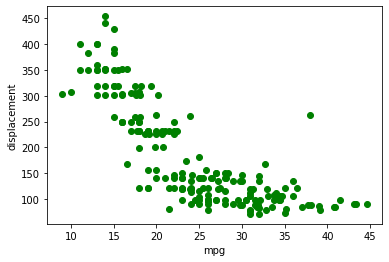

In [31]:
plt.scatter(train_data.iloc[:,1:2], train_data.iloc[:,3:4], color='green')
plt.xlabel(train_data.iloc[:,1:2].columns[0])
plt.ylabel(train_data.iloc[:,3:4].columns[0])
plt.show()

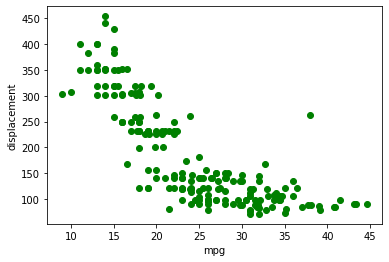

In [41]:
plt.scatter(train_data.iloc[:,1:2].values, train_data.iloc[:,3:4].values, color='green')
plt.xlabel(train_data.iloc[:,1:2].columns[0])
plt.ylabel(train_data.iloc[:,3:4].columns[0])
plt.show()

In [44]:
train_data.iloc[:,4:5].values

array([['84.00'],
       ['71.00'],
       ['108.0'],
       ['75.00'],
       ['62.00'],
       ['90.00'],
       ['105.0'],
       ['180.0'],
       ['113.0'],
       ['135.0'],
       ['120.0'],
       ['75.00'],
       ['88.00'],
       ['165.0'],
       ['100.0'],
       ['69.00'],
       ['70.00'],
       ['60.00'],
       ['80.00'],
       ['132.0'],
       ['85.00'],
       ['130.0'],
       ['93.00'],
       ['130.0'],
       ['?'],
       ['85.00'],
       ['175.0'],
       ['84.00'],
       ['100.0'],
       ['85.00'],
       ['68.00'],
       ['100.0'],
       ['71.00'],
       ['58.00'],
       ['110.0'],
       ['65.00'],
       ['110.0'],
       ['67.00'],
       ['75.00'],
       ['78.00'],
       ['48.00'],
       ['84.00'],
       ['112.0'],
       ['100.0'],
       ['86.00'],
       ['83.00'],
       ['165.0'],
       ['110.0'],
       ['60.00'],
       ['67.00'],
       ['81.00'],
       ['100.0'],
       ['82.00'],
       ['85.00'],
       ['92.00'],
       ['97.00

In [6]:
import numpy as np

type(train_data.iloc[:,4:5].values)

numpy.ndarray

In [7]:
horsepower_float = np.zeros(len(train_data.iloc[:,4:5].values))

In [10]:
for num in range(len(horsepower_float)):
    if train_data.iloc[:,4:5].values[num][0] != '?':
        horsepower_float[num] = float(train_data.iloc[:,4:5].values[num][0])
    else:
        print(num)

horsepower_float

24
113
145
175


array([ 84.,  71., 108.,  75.,  62.,  90., 105., 180., 113., 135., 120.,
        75.,  88., 165., 100.,  69.,  70.,  60.,  80., 132.,  85., 130.,
        93., 130.,   0.,  85., 175.,  84., 100.,  85.,  68., 100.,  71.,
        58., 110.,  65., 110.,  67.,  75.,  78.,  48.,  84., 112., 100.,
        86.,  83., 165., 110.,  60.,  67.,  81., 100.,  82.,  85.,  92.,
        97., 175.,  76., 193.,  70.,  71., 110.,  60., 148.,  97.,  78.,
        72., 170., 140., 220.,  79.,  90., 100.,  84., 110., 198.,  88.,
       140., 120.,  90.,  60., 150., 105., 130., 170.,  64.,  67.,  88.,
        86.,  65.,  70.,  88.,  96.,  85.,  65., 138.,  97.,  78.,  70.,
       150.,  65.,  62.,  70.,  90., 120.,  52., 145., 112., 105.,  90.,
        78., 105., 100.,   0.,  97.,  67.,  95.,  70., 160.,  75., 150.,
        72.,  74.,  76.,  54., 149., 112.,  88., 110., 110., 139.,  67.,
       145., 129.,  63.,  67., 122.,  92.,  90., 110.,  63., 200.,  96.,
        70.,  46.,   0.,  90., 110., 140., 100., 10

In [25]:
train_data.iloc[:,4:5].values[1][0]

'71.00'

In [29]:
train_data.iloc[:,4:5].values[24][0]

'?'

In [11]:
# データセットの欠損値を確認する

# データセットを読み込むためにpandasをインポートする
import pandas as pd

# pandasのread_csvメソッドを用いてデータセットを読み込む
data_set = pd.read_csv('./train.tsv', delimiter='\t')

data_set

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel
...,...,...,...,...,...,...,...,...,...,...
194,384,40.8,4,85.0,65.00,2110.0,19.2,80,3,datsun 210
195,385,20.2,8,302.0,139.0,3570.0,12.8,78,1,mercury monarch ghia
196,387,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
197,395,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


In [18]:
# データセットの各カラムの欠損値の有無を確認する
# データセット内で欠損値は'?'（文字列）として登録されている

row_num = 0;
for data_array in data_set.iloc[:,:].values:
    column_num = 0
    for data in data_array:
        if data == '?':
            print('row_num = ' + str(row_num) + ', column_num = ' + str(column_num))
        column_num += 1
    row_num += 1

row_num = 24, column_num = 4
row_num = 113, column_num = 4
row_num = 145, column_num = 4
row_num = 175, column_num = 4


In [24]:
# データセット内に4箇所（4つのデータ）の欠損値が存在することが分かった
# これらの4つのデータをデータセットから削除する

# 削除するデータを確認
data_set.iloc[[24,113,145,175],:]

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
24,48,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl
113,234,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
145,288,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
175,349,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto


In [27]:
# 欠損値があるデータをデータセットから削除する
# 欠損値を平均値・中央値・最頻値で補完する方法もあるが、欠損値を含むデータが少ないため、ここでは削除するという方法を用いた
ds_omit_mv = data_set.drop([24,113,145,175])

In [28]:
# データセットから欠損値があるデータが削除されたことを確認する
row_num = 0;
for data_array in ds_omit_mv.iloc[:,:].values:
    column_num = 0
    for data in data_array:
        if data == '?':
            print('row_num = ' + str(row_num) + ', column_num = ' + str(column_num))
        column_num += 1
    row_num += 1

In [52]:
# データセットの各カラムの型を確認する
ds_omit_mv.dtypes

id                int64
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [62]:
# 想定と異なる型となっているデータの型を変換する
ds_omit_mv = ds_omit_mv.astype({'horsepower': float})

In [64]:
# データセットの全てのカラムが想定通りになっていることを確認する
ds_omit_mv.dtypes

id                int64
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [66]:
ds_omit_mv

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.0,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.0,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.0,2050.0,17.3,81,3,toyota tercel
...,...,...,...,...,...,...,...,...,...,...
194,384,40.8,4,85.0,65.0,2110.0,19.2,80,3,datsun 210
195,385,20.2,8,302.0,139.0,3570.0,12.8,78,1,mercury monarch ghia
196,387,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
197,395,43.4,4,90.0,48.0,2335.0,23.7,80,2,vw dasher (diesel)


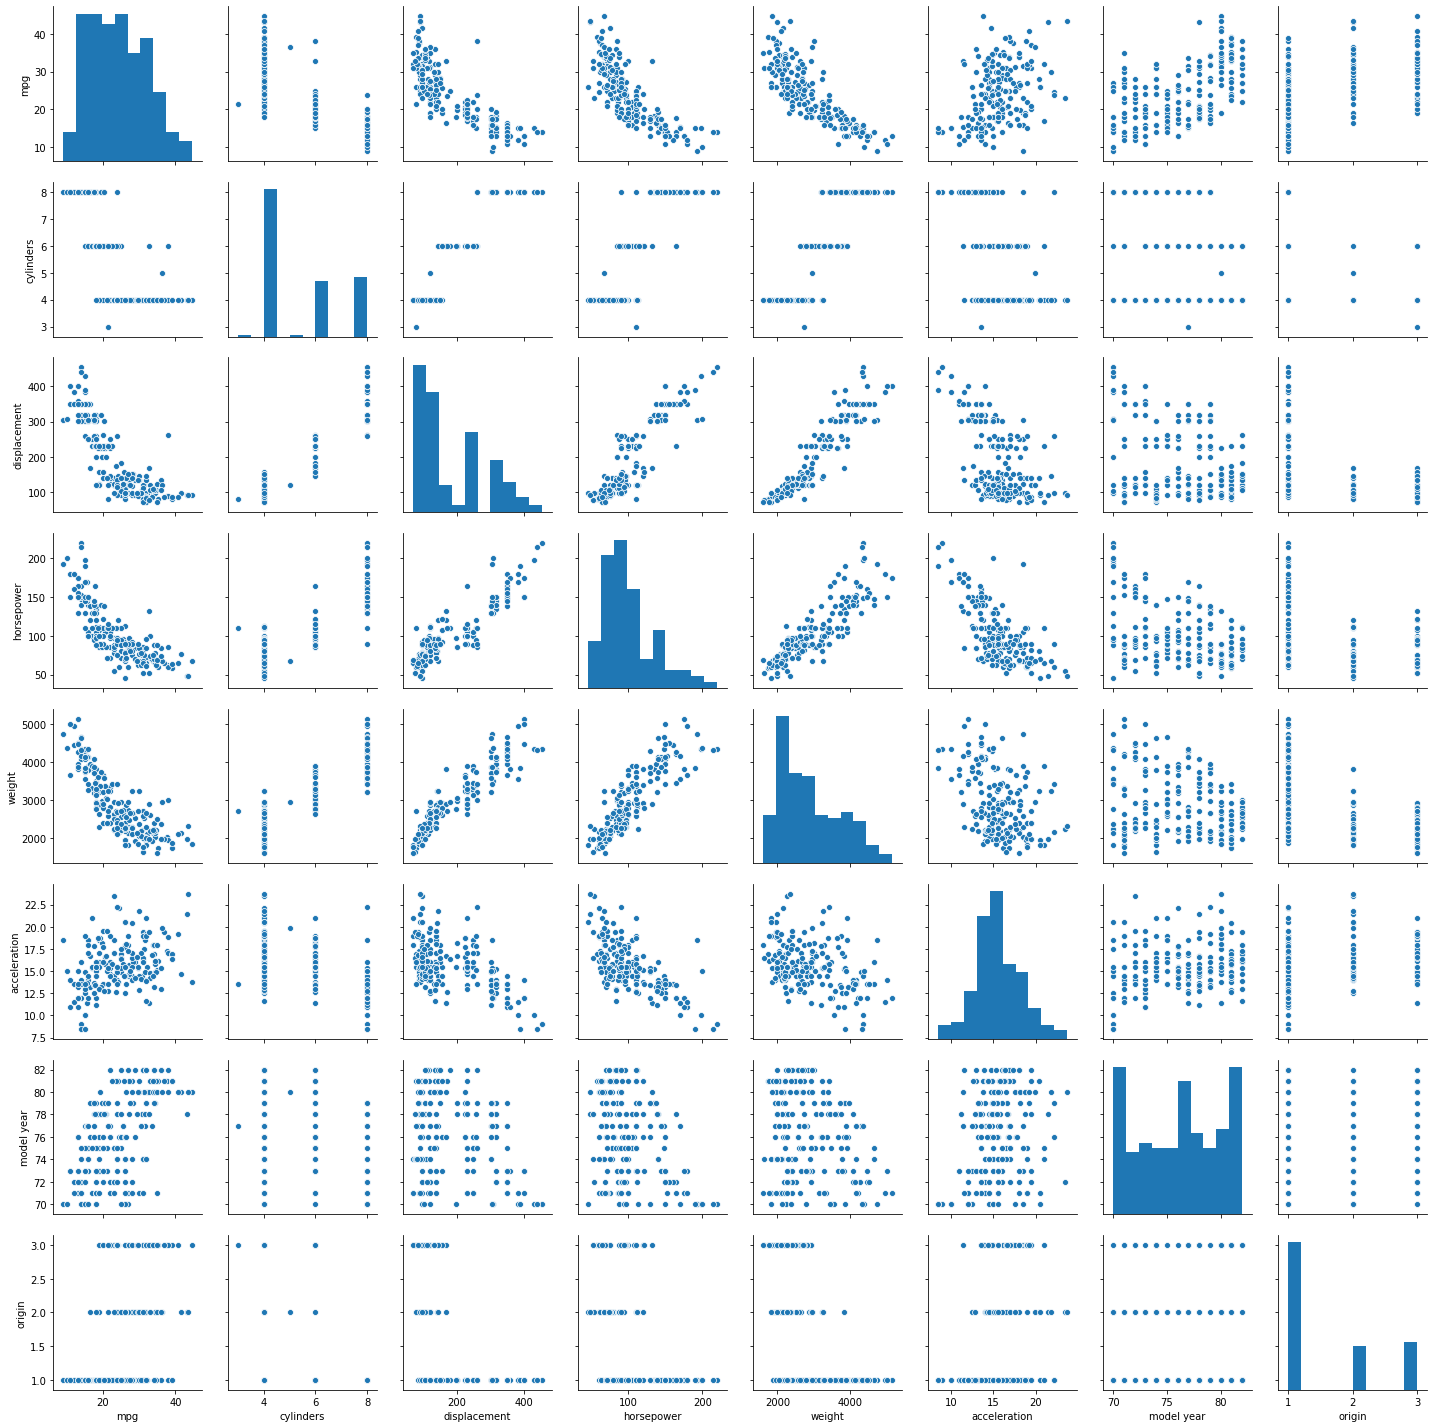

In [68]:
# seabornを用いて特徴量間の相関を確認する

import matplotlib.pyplot as plt
import seaborn as sns

# データセットの内、idとcar nameを除いた8つの特徴量に関する相関を計算する
sns.pairplot(ds_omit_mv.iloc[:,1:9])
plt.show()

In [72]:
# 目的変数であるmpgとの相関を見る（pairplotの最上段の図）
# 負の相関：displacement、horsepower、weight、cylinders
# 正の相関：model year、origin
# 無相関：acceleration

# accelerationは目的変数を説明することができない特徴量と判断し、データセットから削除する
ds_omit_mv = ds_omit_mv.drop(['acceleration'], axis=1)

KeyError: "['acceleration'] not found in axis"

In [74]:
# ついでにidとcar nameの列も削除する
ds_omit_mv = ds_omit_mv.drop(['car name', 'id'], axis=1)

In [102]:
# displacement、horsepower、weight、cylindersが同一の負の相関であるため、
# 分散が一番大きいweightを残して他の特徴量を削除する
ds_omit_mv = ds_omit_mv.drop(['displacement','horsepower','cylinders'], axis=1)

In [104]:
# model year、originが同一の正の相関であるため、
# 分散が一番大きいmodel_yearを残して他の特徴量を削除する
ds_omit_mv = ds_omit_mv.drop(['origin'], axis=1)

In [105]:
ds_omit_mv

,mpg,weight,model year
0,29.0,2525.0,82
1,31.9,1925.0,79
2,19.0,2930.0,76
3,28.0,2125.0,74
4,37.7,2050.0,81
...,...,...,...
194,40.8,2110.0,80
195,20.2,3570.0,78
196,16.0,3433.0,70
197,43.4,2335.0,80


In [106]:
# データセットを目的変数と特徴量に分割する

ds_X = ds_omit_mv.iloc[:,1:7]
ds_Y = ds_omit_mv.iloc[:,0]

In [110]:
from sklearn.model_selection import train_test_split

# トレーニングデータを学習用データ（learning_data）と検証用データ（learning_data）に分割する
learning_data_X, validation_data_X, learning_data_Y, validation_data_Y = train_test_split(
    ds_X, ds_Y, test_size=0.3, random_state=1)

In [111]:
# 特徴量を標準化する

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc.fit(learning_data_X)

learning_data_X = stdsc.transform(learning_data_X)
validation_data_X = stdsc.transform(validation_data_X)

In [112]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)

lr.fit(learning_data_X, learning_data_Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'